In [62]:
from astropy.io import fits
import os
import glob
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from astropy.time import Time

import sys
sys.path.append('/dark/bostroem/research/ASASSN15oz/code')
import util
from matplotlib.backends.backend_pdf import PdfPages

In [63]:
FIG_DIR = '../figures'
DATA_DIR = '../data/EFOSC'

In [68]:
flist = glob.glob(os.path.join(DATA_DIR, '201?????/tAS*_e_*.fits'))+glob.glob(os.path.join(DATA_DIR, '201?????/tAS*_e.fits'))
date_list = []
for ifile in flist:
    date_list.append(fits.getval(ifile, 'date-obs', 0))
    
date_list = Time(date_list, format = 'isot')
sort_indx = date_list.argsort()
date_list = date_list.sort()
flist = np.array(flist)
sorted_flist = flist[sort_indx]
for i in sorted_flist:
    print(i)

../data/EFOSC/20151004/tASASSN-15oz_20151003_Gr13_Free_slit1.0_57687_1_e_ltt7379.fits
../data/EFOSC/20151004/tASASSN-15oz_20151003_Gr13_Free_slit1.0_57687_1_e_L745.fits
../data/EFOSC/20151108/tASAS-SN_15oz_20151107_Gr13_Free_slit1.5_57687_1_e_L745.fits
../data/EFOSC/20151108/tASAS-SN_15oz_20151107_Gr13_Free_slit1.5_57687_1_e_feige110.fits
../data/EFOSC/20151119/tASAS-SN_15oz_20151118_Gr13_Free_slit1.0_57692_1_e.fits
../data/EFOSC/20160411/tASASSN-15oz_20160410_Gr13_Free_slit1.5_57686_2_e_ltt7379.fits
../data/EFOSC/20160411/tASASSN-15oz_20160410_Gr13_Free_slit1.5_57686_2_e_ltt3864.fits
../data/EFOSC/20160411/tASASSN-15oz_20160410_Gr13_Free_slit1.5_57686_1_e_ltt3864.fits
../data/EFOSC/20160411/tASASSN-15oz_20160410_Gr13_Free_slit1.5_57686_1_e_ltt7379.fits
../data/EFOSC/20160803/tASASSN-15oz_20160802_Gr13_Free_slit1.0_57687_1_e_feige110.fits
../data/EFOSC/20160803/tASASSN-15oz_20160802_Gr13_Free_slit1.0_57687_1_e_LTT7379.fits
../data/EFOSC/20160919/tASASSN-15oz_20160918_Gr13_Free_slit1.5_

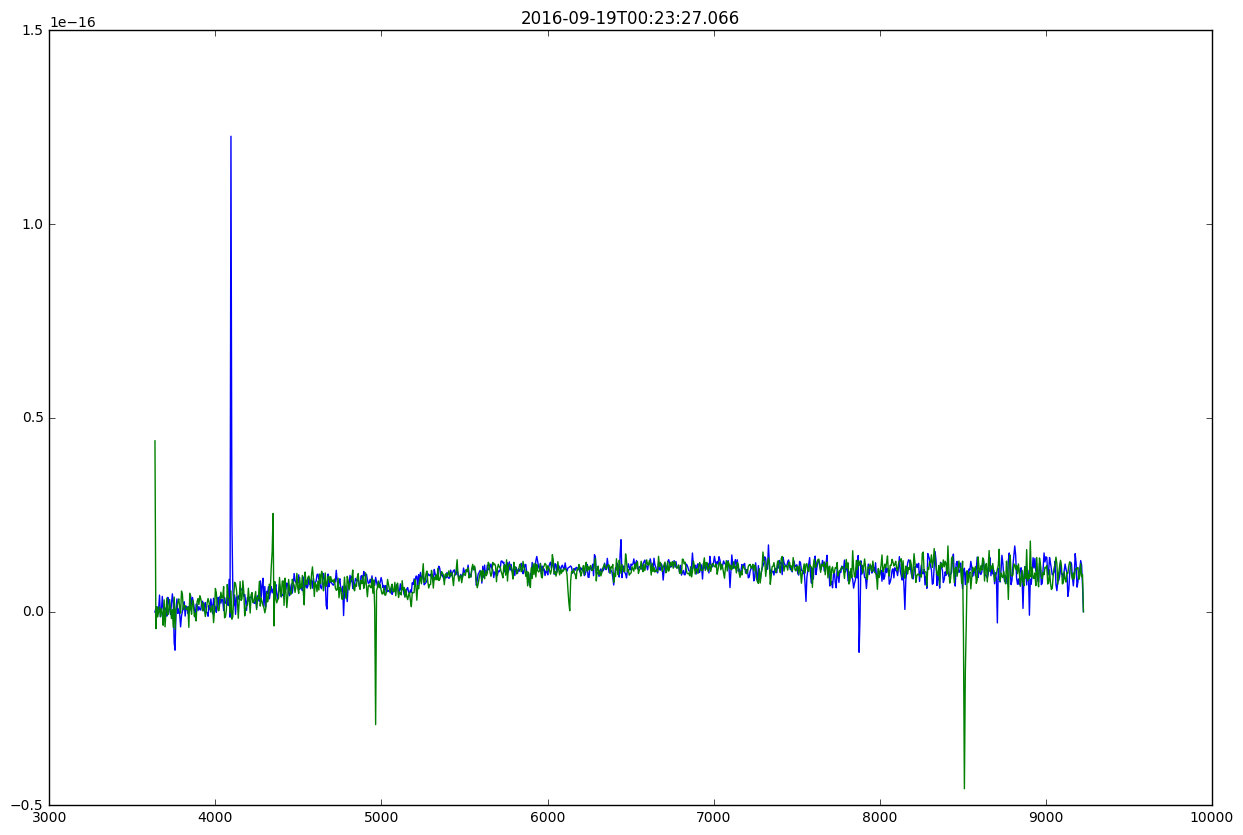

In [69]:
with PdfPages(os.path.join(FIG_DIR, 'quicklook_spec.pdf')) as pdf:
    for indx, ifile in enumerate(sorted_flist):
        if indx != 0:
            if (date_list[indx] - date_list[indx-1]).value > 1:
                pyplot.legend()
                pdf.savefig()
                pyplot.close()
                pyplot.figure(figsize=[15, 10])
                ofile = fits.open(ifile)
                hdr = ofile[0].header
                data = ofile[0].data
                wl = util.calc_wavelength(hdr, np.arange(len(data[0, 0,:]))+1)
                pyplot.plot(wl, data[0, 0,:], label = '{}'.format(os.path.basename(ifile)))
                pyplot.title(date_list[indx])
            else:
                ofile = fits.open(ifile)
                hdr = ofile[0].header
                data = ofile[0].data
                wl = util.calc_wavelength(hdr, np.arange(len(data[0, 0, :]))+1)
                pyplot.plot(wl, data[0, 0, :], label = '{}'.format(os.path.basename(ifile)))

        if indx == 0:
                pyplot.figure(figsize=[15, 10])
                ofile = fits.open(ifile)
                hdr = ofile[0].header
                data = ofile[0].data
                wl = util.calc_wavelength(hdr, np.arange(len(data[0, 0, :]))+1)
                pyplot.plot(wl, data[0, 0, :], label = '{}'.format(os.path.basename(ifile)))
                pyplot.title(date_list[indx])        
        if ifile == flist[-1]:
            pdf.savefig()
                

In [66]:
date_list.argsort()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
wl

array([ 3640.69042969,  3646.2061162 ,  3651.72180271, ...,  9222.56517982,
        9228.08086634,  9233.59655285])